In [49]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import graphviz 
import pydotplus


from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier




In [50]:
data = pd.read_csv('ML_EXAM2_2.csv')

In [51]:
data.head()

,Unnamed: 0,age,employment_status,open_credit_lines,monthly_income,credit_score,eligibility,products_viewed
0,0,59,Unemployed,6,3978,744,No,"Jacket,Notepad,Chair,Microphone,Hiking_Boots,S..."
1,1,34,Self-Employed,10,6559,621,No,"Yoga_Mat,Board_Game,Travel_Pillow,Chess_Set,Sl..."
2,2,30,Employed,4,3215,781,Yes,"Keyboard,Microphone,Keyboard,Resistance_Bands"
3,3,31,Employed,7,8907,726,Yes,"Gaming_Headset,Toaster,Guitar"
4,4,33,Unemployed,9,8721,604,No,"Shoe,Snowshoes,Scanner,Shoe,Microphone,Board_G..."


In [52]:
data.drop('Unnamed: 0', axis = 1, inplace = True)

In [53]:
data.head()

,age,employment_status,open_credit_lines,monthly_income,credit_score,eligibility,products_viewed
0,59,Unemployed,6,3978,744,No,"Jacket,Notepad,Chair,Microphone,Hiking_Boots,S..."
1,34,Self-Employed,10,6559,621,No,"Yoga_Mat,Board_Game,Travel_Pillow,Chess_Set,Sl..."
2,30,Employed,4,3215,781,Yes,"Keyboard,Microphone,Keyboard,Resistance_Bands"
3,31,Employed,7,8907,726,Yes,"Gaming_Headset,Toaster,Guitar"
4,33,Unemployed,9,8721,604,No,"Shoe,Snowshoes,Scanner,Shoe,Microphone,Board_G..."


In [54]:
data.columns

Index(['age', 'employment_status', 'open_credit_lines', 'monthly_income',
       'credit_score', 'eligibility', 'products_viewed'],
      dtype='object')

In [55]:
cols = ['employment_status', 'open_credit_lines', 'monthly_income',
       'credit_score', 'eligibility']

In [56]:
df = data[cols].copy()

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   employment_status  30 non-null     object
 1   open_credit_lines  30 non-null     int64 
 2   monthly_income     30 non-null     int64 
 3   credit_score       30 non-null     int64 
 4   eligibility        30 non-null     object
dtypes: int64(3), object(2)
memory usage: 1.3+ KB


In [58]:
# Encoding the values

df['employment_status'] = df['employment_status'].map({'Unemployed': 0, 'Self-Employed': 1, 'Employed': 2})
df['eligibility'] = df['eligibility'].map({"Yes": 1, "No":0})

df.head()

,employment_status,open_credit_lines,monthly_income,credit_score,eligibility
0,0,6,3978,744,0
1,1,10,6559,621,0
2,2,4,3215,781,1
3,2,7,8907,726,1
4,0,9,8721,604,0


<Axes: >

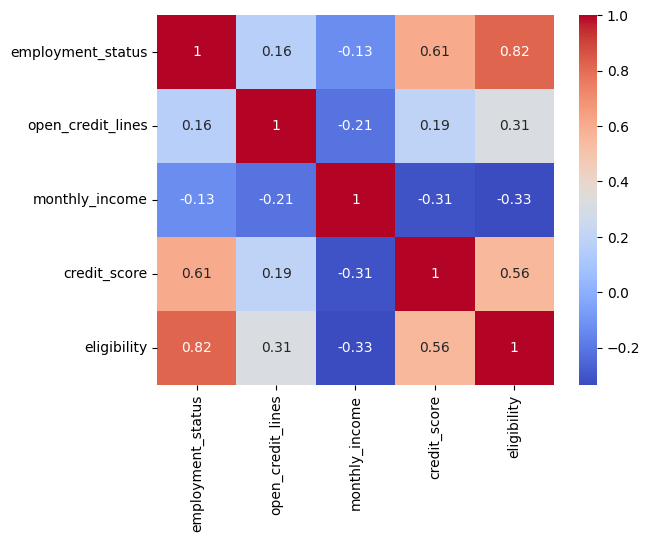

In [59]:
correlation_matrix = df.corr()

# Visualize correlation matrix
import seaborn as sns
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

## Train - Test Split

In [60]:
x = df.drop('eligibility', axis = 1)
y = df[['eligibility']]

x.head()

,employment_status,open_credit_lines,monthly_income,credit_score
0,0,6,3978,744
1,1,10,6559,621
2,2,4,3215,781
3,2,7,8907,726
4,0,9,8721,604


In [61]:
y.head()

,eligibility
0,0
1,0
2,1
3,1
4,0


In [62]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, shuffle=3)

D:\Masters-2023\Machine Learning\ML\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(


In [63]:
x_train.shape

(21, 4)

In [64]:
x_test.shape

(9, 4)

In [65]:
y_test.shape, y_train.shape

((9, 1), (21, 1))

# MODEL 1: Naive Bayes

In [66]:
clf = GaussianNB()
clf.fit(x_train, y_train)

D:\Masters-2023\Machine Learning\ML\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [67]:
clf.score(x_train, y_train)

0.9523809523809523

In [68]:
pred = clf.predict(x_test)

In [69]:
report = metrics.classification_report(y_test, pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.80      1.00      0.89         4

    accuracy                           0.89         9
   macro avg       0.90      0.90      0.89         9
weighted avg       0.91      0.89      0.89         9



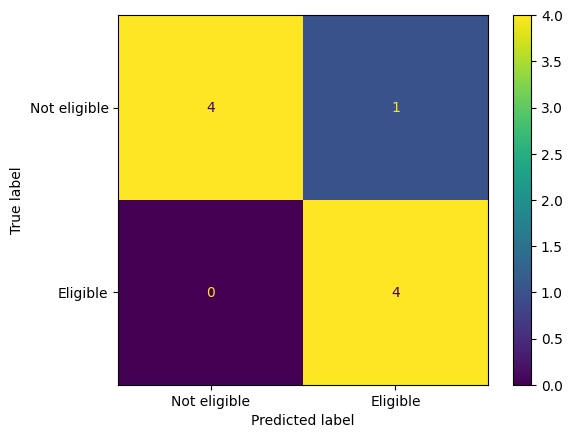

In [70]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

labels = {
    0: "Not eligible",
    1: "Eligible"
}

# Assuming 'clf' is your classifier and 'y_test' is the true labels and 'pred' is the predicted labels
cm = confusion_matrix(y_test, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[labels[i] for i in clf.classes_])
disp.plot()
plt.show()


In [71]:
cm

array([[4, 1],
       [0, 4]], dtype=int64)

In [72]:
accuracy = accuracy_score(y_test, pred)
accuracy

0.8888888888888888

## MODEL 2

In [73]:
clf = svm.SVC()
clf.fit(x_train, y_train)

D:\Masters-2023\Machine Learning\ML\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [74]:
# Function to plot confusion matrix
def plot_confusion_matrix(cm, classes, title, cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


In [75]:
def evaluate_and_plot(model, X_test, y_test, kernel_name, cost):
    # Predictions
    y_pred = model.predict(X_test)

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(cm, classes=['Not Popular', 'Popular'], title=f'Confusion Matrix ({kernel_name} Kernel, Cost={cost})')

    # Calculate accuracy
    acc = accuracy_score(y_test, y_pred)
    print(f'Accuracy ({kernel_name} Kernel): {acc:.2f}')
    print(f'CM: {kernel_name} - {cm}')


    # Clear the current figure to start with a fresh one
    plt.clf()

    # Save the figure directly without closing it
    #plt.savefig(save_path)

    # Calculate and print classification report
    class_report = classification_report(y_test, y_pred, target_names=['Not Popular', 'Popular'])
    print(f'Classification Report ({kernel_name} Kernel, Cost={cost}):')
    print(class_report)


# Try different kernels and costs
kernels = ['linear', 'rbf', 'poly']
costs = [1, 10, 100]


D:\Masters-2023\Machine Learning\ML\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


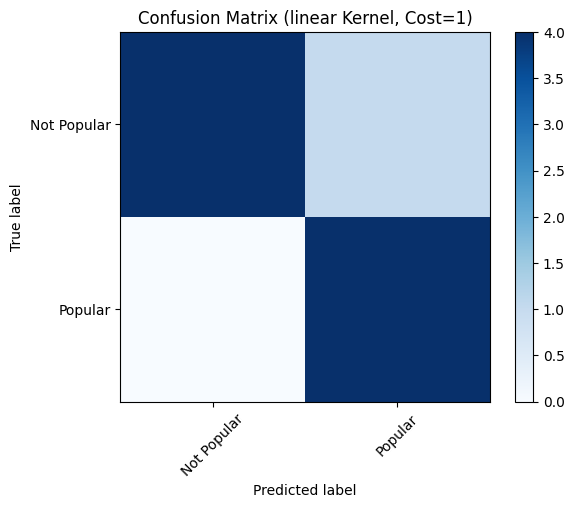

D:\Masters-2023\Machine Learning\ML\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy (linear Kernel): 0.89
CM: linear - [[4 1]
 [0 4]]
Classification Report (linear Kernel, Cost=1):
              precision    recall  f1-score   support

 Not Popular       1.00      0.80      0.89         5
     Popular       0.80      1.00      0.89         4

    accuracy                           0.89         9
   macro avg       0.90      0.90      0.89         9
weighted avg       0.91      0.89      0.89         9



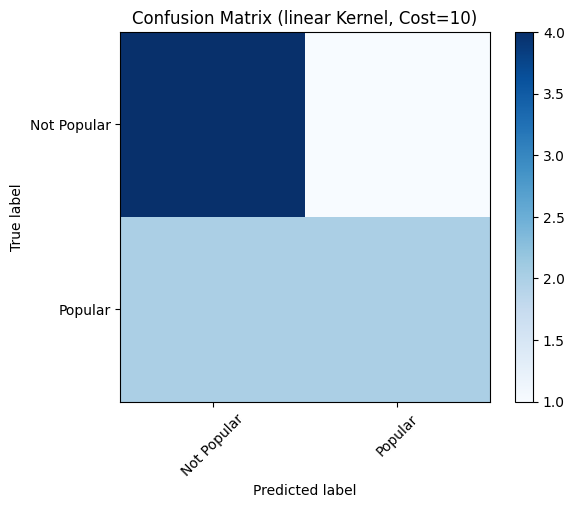

Accuracy (linear Kernel): 0.67
CM: linear - [[4 1]
 [2 2]]
Classification Report (linear Kernel, Cost=10):
              precision    recall  f1-score   support

 Not Popular       0.67      0.80      0.73         5
     Popular       0.67      0.50      0.57         4

    accuracy                           0.67         9
   macro avg       0.67      0.65      0.65         9
weighted avg       0.67      0.67      0.66         9



D:\Masters-2023\Machine Learning\ML\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


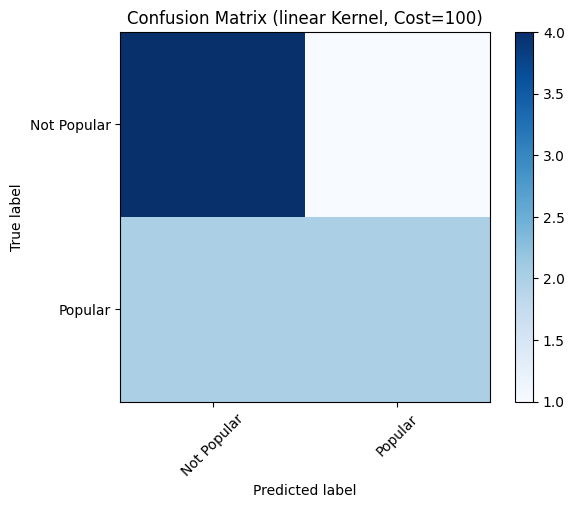

Accuracy (linear Kernel): 0.67
CM: linear - [[4 1]
 [2 2]]
Classification Report (linear Kernel, Cost=100):
              precision    recall  f1-score   support

 Not Popular       0.67      0.80      0.73         5
     Popular       0.67      0.50      0.57         4

    accuracy                           0.67         9
   macro avg       0.67      0.65      0.65         9
weighted avg       0.67      0.67      0.66         9



D:\Masters-2023\Machine Learning\ML\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


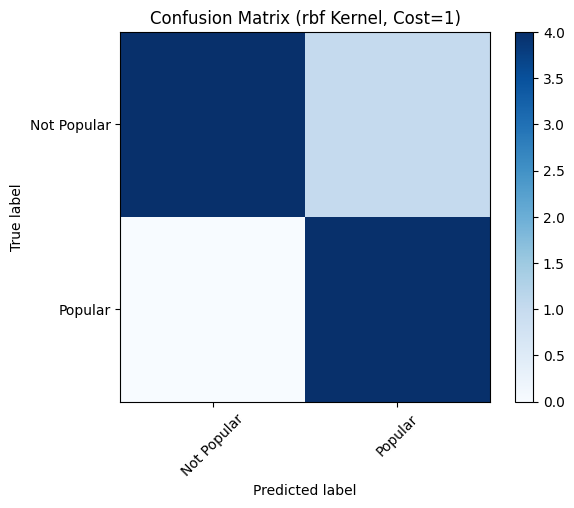

Accuracy (rbf Kernel): 0.89
CM: rbf - [[4 1]
 [0 4]]
Classification Report (rbf Kernel, Cost=1):
              precision    recall  f1-score   support

 Not Popular       1.00      0.80      0.89         5
     Popular       0.80      1.00      0.89         4

    accuracy                           0.89         9
   macro avg       0.90      0.90      0.89         9
weighted avg       0.91      0.89      0.89         9



D:\Masters-2023\Machine Learning\ML\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


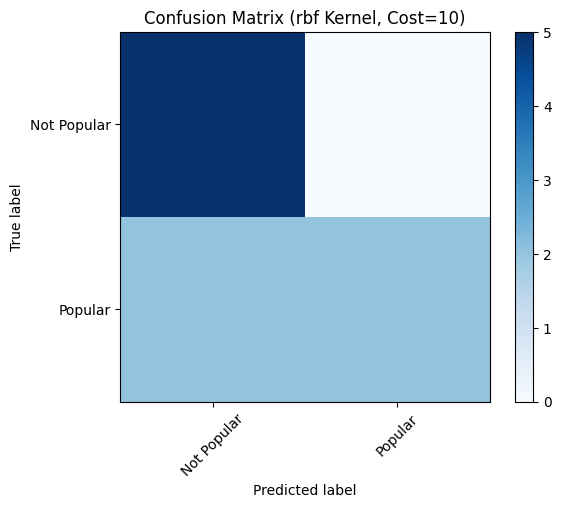

Accuracy (rbf Kernel): 0.78
CM: rbf - [[5 0]
 [2 2]]
Classification Report (rbf Kernel, Cost=10):
              precision    recall  f1-score   support

 Not Popular       0.71      1.00      0.83         5
     Popular       1.00      0.50      0.67         4

    accuracy                           0.78         9
   macro avg       0.86      0.75      0.75         9
weighted avg       0.84      0.78      0.76         9



D:\Masters-2023\Machine Learning\ML\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


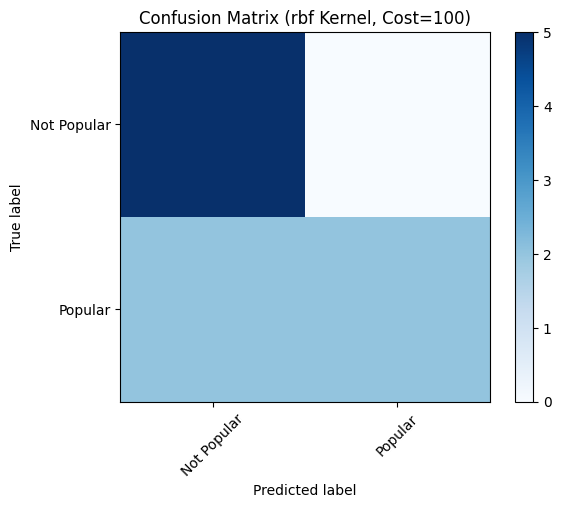

Accuracy (rbf Kernel): 0.78
CM: rbf - [[5 0]
 [2 2]]
Classification Report (rbf Kernel, Cost=100):
              precision    recall  f1-score   support

 Not Popular       0.71      1.00      0.83         5
     Popular       1.00      0.50      0.67         4

    accuracy                           0.78         9
   macro avg       0.86      0.75      0.75         9
weighted avg       0.84      0.78      0.76         9



D:\Masters-2023\Machine Learning\ML\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


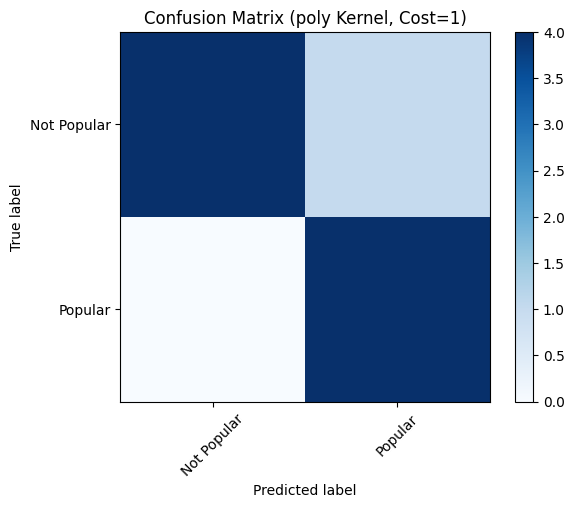

Accuracy (poly Kernel): 0.89
CM: poly - [[4 1]
 [0 4]]
Classification Report (poly Kernel, Cost=1):
              precision    recall  f1-score   support

 Not Popular       1.00      0.80      0.89         5
     Popular       0.80      1.00      0.89         4

    accuracy                           0.89         9
   macro avg       0.90      0.90      0.89         9
weighted avg       0.91      0.89      0.89         9



D:\Masters-2023\Machine Learning\ML\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


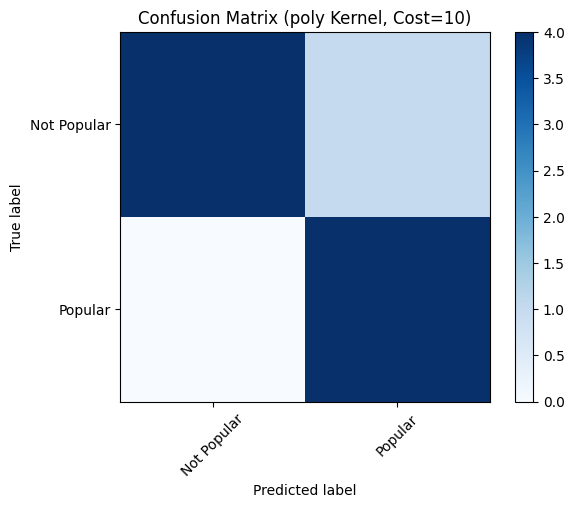

Accuracy (poly Kernel): 0.89
CM: poly - [[4 1]
 [0 4]]
Classification Report (poly Kernel, Cost=10):
              precision    recall  f1-score   support

 Not Popular       1.00      0.80      0.89         5
     Popular       0.80      1.00      0.89         4

    accuracy                           0.89         9
   macro avg       0.90      0.90      0.89         9
weighted avg       0.91      0.89      0.89         9



D:\Masters-2023\Machine Learning\ML\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


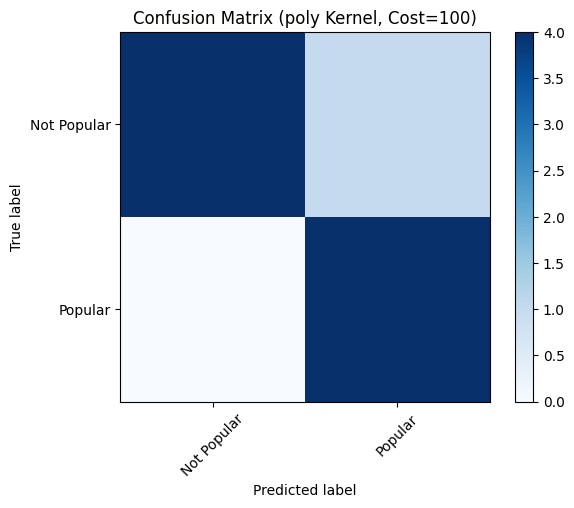

Accuracy (poly Kernel): 0.89
CM: poly - [[4 1]
 [0 4]]
Classification Report (poly Kernel, Cost=100):
              precision    recall  f1-score   support

 Not Popular       1.00      0.80      0.89         5
     Popular       0.80      1.00      0.89         4

    accuracy                           0.89         9
   macro avg       0.90      0.90      0.89         9
weighted avg       0.91      0.89      0.89         9



<Figure size 640x480 with 0 Axes>

In [76]:
for kernel in kernels:
    for cost in costs:
        # Create SVM model with specified kernel and cost
        clf = svm.SVC(kernel=kernel, C=cost)

        # Create a pipeline with standardization
        model = make_pipeline(StandardScaler(), clf)

        # Fit the model
        model.fit(x_train, y_train)

        # Evaluate and plot results
        evaluate_and_plot(model, x_test, y_test, kernel, cost)

## MODEL 3: DT

In [77]:
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(x_train, y_train)

# Make predictions on the test set
y_pred = dt_classifier.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(confusion)
print("Classification Report:")
print(classification_rep)

Accuracy: 1.0
Confusion Matrix:
[[5 0]
 [0 4]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         4

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9



In [78]:
MyDT_Classifier = tree.DecisionTreeClassifier()
MyDT_Classifier = MyDT_Classifier.fit(x_test, y_test)

In [79]:
# Class names as integers
class_names = ["No", "Yes"]
TREE_Vis = tree.export_graphviz(MyDT_Classifier, 
                    feature_names=x_train.columns,  
                    class_names=[str(class_name) for class_name in class_names],
                    filled=True, rounded=True)  

In [80]:
#Export to pdf
DT_graph = pydotplus.graph_from_dot_data(TREE_Vis)
#DT_graph.write_pdf("Channel_Tree.pdf")
DT_graph.write_png("Exam2_Part3.png")

True